In [1]:
# Import modules
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('games_info_and_reviews.csv')

In [3]:
df.head(3)

,game_id,game_name,is_free,genres,categories,release_date,price,required_age,review_score_desc,total_positive_reviews,total_negative_reviews,review_score,owners
0,1744330,No More Heroes 3,False,Action,"Single-player, Steam Achievements, Full contro...","11 Oct, 2022",CDN$ 49.99,17,Very Positive,232,46,8,"20,000 .. 50,000"
1,1743380,SCP: Doki Doki Anomaly,False,"Indie, RPG","Single-player, Steam Achievements","7 Oct, 2021",CDN$ 6.69,0,Very Positive,51,4,8,"0 .. 20,000"
2,1742450,西游记2021,False,"Adventure, Casual, Indie, RPG, Strategy",Single-player,"30 Sep, 2021",CDN$ 11.49,0,No user reviews,0,0,0,"50,000 .. 100,000"


In [4]:
# Find unique genres across all rows
unique_genres = set()
for genres in df['genres']:
    if genres is not None:
        unique_genres.update(genres.split(', '))

# Create columns for each unique genre
for genre in unique_genres:
    df[genre] = 0

# Assign 1 to corresponding genre columns for each game
for index, row in df.iterrows():
    genres = row['genres']
    if genres is not None:
        for genre in genres.split(', '):
            df.at[index, genre] = 1

# Drop the original 'genres' column
df.drop(columns=['genres'], inplace=True)

# print(df)

In [5]:
# print(df.columns)

In [6]:
import pandas as pd

# Columns to include in the new DataFrame
selected_columns = ['game_id', 'game_name', 'is_free', 'categories', 'release_date', 
                    'price', 'required_age', 'review_score_desc', 'total_positive_reviews', 
                    'total_negative_reviews', 'review_score', 'owners', 'Education', 
                    'Design & Illustration', 'Video Production', 'Game Development', 
                    'Free to Play', 'Massively Multiplayer', 'Audio Production', 
                    'Early Access', 'Software Training', 'Indie', 'Nudity', 'Sports', 
                    'Gore', 'Racing', 'Animation & Modeling', 'Violent', 'Action', 
                    'Casual', 'Adventure', 'Utilities', 'Simulation']

# Create a new DataFrame with selected columns
df = df.loc[:, selected_columns]

# Display the new DataFrame
# print(df)


In [7]:
df.columns

Index(['game_id', 'game_name', 'is_free', 'categories', 'release_date',
       'price', 'required_age', 'review_score_desc', 'total_positive_reviews',
       'total_negative_reviews', 'review_score', 'owners', 'Education',
       'Design & Illustration', 'Video Production', 'Game Development',
       'Free to Play', 'Massively Multiplayer', 'Audio Production',
       'Early Access', 'Software Training', 'Indie', 'Nudity', 'Sports',
       'Gore', 'Racing', 'Animation & Modeling', 'Violent', 'Action', 'Casual',
       'Adventure', 'Utilities', 'Simulation'],
      dtype='object')

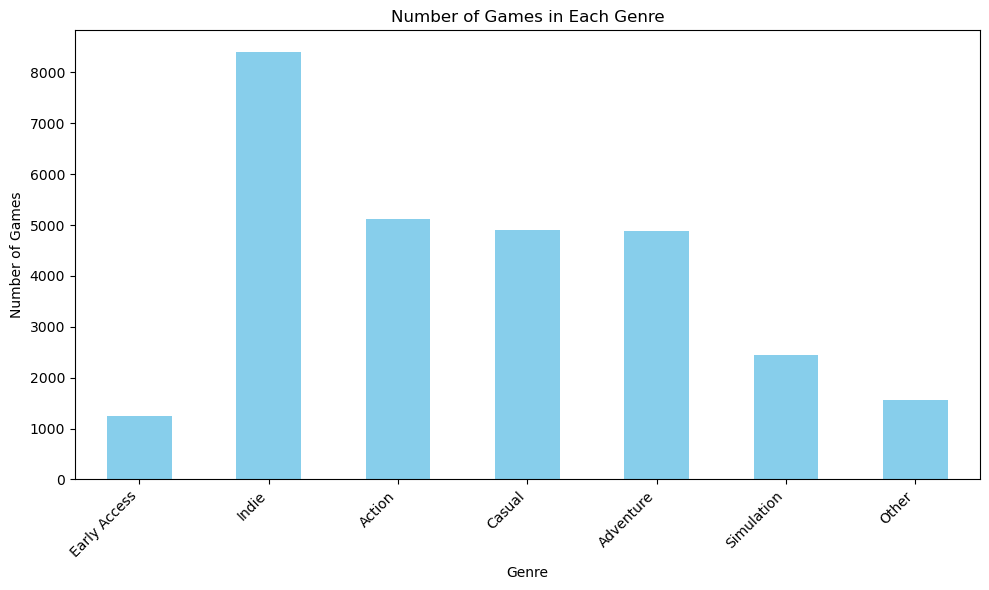

In [8]:
import matplotlib.pyplot as plt

# Extract genre columns
genre_columns = ['Education', 'Design & Illustration', 'Video Production', 'Game Development', 
                 'Free to Play', 'Massively Multiplayer', 'Audio Production', 'Early Access', 
                 'Software Training', 'Indie', 'Nudity', 'Sports', 'Gore', 'Racing', 
                 'Animation & Modeling', 'Violent', 'Action', 'Casual', 'Adventure', 
                 'Utilities', 'Simulation']

# Calculate genre counts
genre_counts = df[genre_columns].sum()

# Identify genres with counts > 1000
genres_over_1000 = genre_counts[genre_counts < 1000]

# Sum counts of genres over 1000
other_count = genres_over_1000.sum()

# Add 'Other' category to the count
genre_counts['Other'] = other_count

# Drop columns that are moved to 'Other'
genre_counts.drop(labels=genres_over_1000.index, inplace=True)

# Plotting
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Games in Each Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Games')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()


In [9]:
# file_path = 'games_data.csv'
data = df

# Function to convert range to a single value
def convert_owners_range(owners_range):
    range_split = owners_range.split(' .. ')
    lower_bound = int(range_split[0].replace(',', ''))
    upper_bound = int(range_split[1].replace(',', ''))
    return (lower_bound + upper_bound) // 2

# Apply the conversion function to the 'owners' column
data['owners'] = data['owners'].apply(convert_owners_range)

# Print the updated dataset
# print(data)


In [10]:
df['owners'].value_counts()

10000       8424
35000       1381
75000        738
150000       479
350000       455
750000       205
1500000      123
3500000      108
7500000       33
15000000      11
35000000      10
75000000       1
Name: owners, dtype: int64

In [11]:
df.head()

,game_id,game_name,is_free,categories,release_date,price,required_age,review_score_desc,total_positive_reviews,total_negative_reviews,...,Sports,Gore,Racing,Animation & Modeling,Violent,Action,Casual,Adventure,Utilities,Simulation
0,1744330,No More Heroes 3,False,"Single-player, Steam Achievements, Full contro...","11 Oct, 2022",CDN$ 49.99,17,Very Positive,232,46,...,0,0,0,0,0,1,0,0,0,0
1,1743380,SCP: Doki Doki Anomaly,False,"Single-player, Steam Achievements","7 Oct, 2021",CDN$ 6.69,0,Very Positive,51,4,...,0,0,0,0,0,0,0,0,0,0
2,1742450,西游记2021,False,Single-player,"30 Sep, 2021",CDN$ 11.49,0,No user reviews,0,0,...,0,0,0,0,0,0,1,1,0,0
3,1742470,My Newborn Life In A Harem,False,Single-player,"29 Mar, 2022",CDN$ 14.49,0,Mixed,18,12,...,0,0,0,0,0,0,1,0,0,0
4,1742500,My Dear Frankenstein -English Edition-,False,Single-player,"30 Sep, 2021",CDN$ 5.69,0,4 user reviews,4,0,...,0,0,0,0,0,0,0,1,0,0


In [12]:
df['price'].value_counts()

CDN$ 1.29     717
CDN$ 6.49     713
CDN$ 11.49    571
CDN$ 5.69     520
CDN$ 2.59     495
             ... 
CDN$ 1.71       1
CDN$ 3.69       1
$1.75           1
$43.99 USD      1
₩ 22,000        1
Name: price, Length: 768, dtype: int64

In [19]:
# Conversion rate from USD to CDN
usd_to_cdn_rate = 1.28

# Remove rows where currency is not CDN or USD and convert USD to CDN
df['price'] = df['price'].apply(lambda x: x if 'CDN' in x or 'USD' in x else None)
df['price'] = df['price'].apply(lambda x: float(x.split()[1]) * usd_to_cdn_rate if 'USD' in x else float(x.split()[1]) if x else None)

# Drop rows with NaN values in the 'price' column
# df = df.dropna(subset=['price'])

# Display the value counts of the 'price' column
# print(df['price'].value_counts())


TypeError: argument of type 'NoneType' is not iterable

In [14]:
df.head(2)

,game_id,game_name,is_free,categories,release_date,price,required_age,review_score_desc,total_positive_reviews,total_negative_reviews,...,Sports,Gore,Racing,Animation & Modeling,Violent,Action,Casual,Adventure,Utilities,Simulation
0,1744330,No More Heroes 3,False,"Single-player, Steam Achievements, Full contro...","11 Oct, 2022",CDN$ 49.99,17,Very Positive,232,46,...,0,0,0,0,0,1,0,0,0,0
1,1743380,SCP: Doki Doki Anomaly,False,"Single-player, Steam Achievements","7 Oct, 2021",CDN$ 6.69,0,Very Positive,51,4,...,0,0,0,0,0,0,0,0,0,0


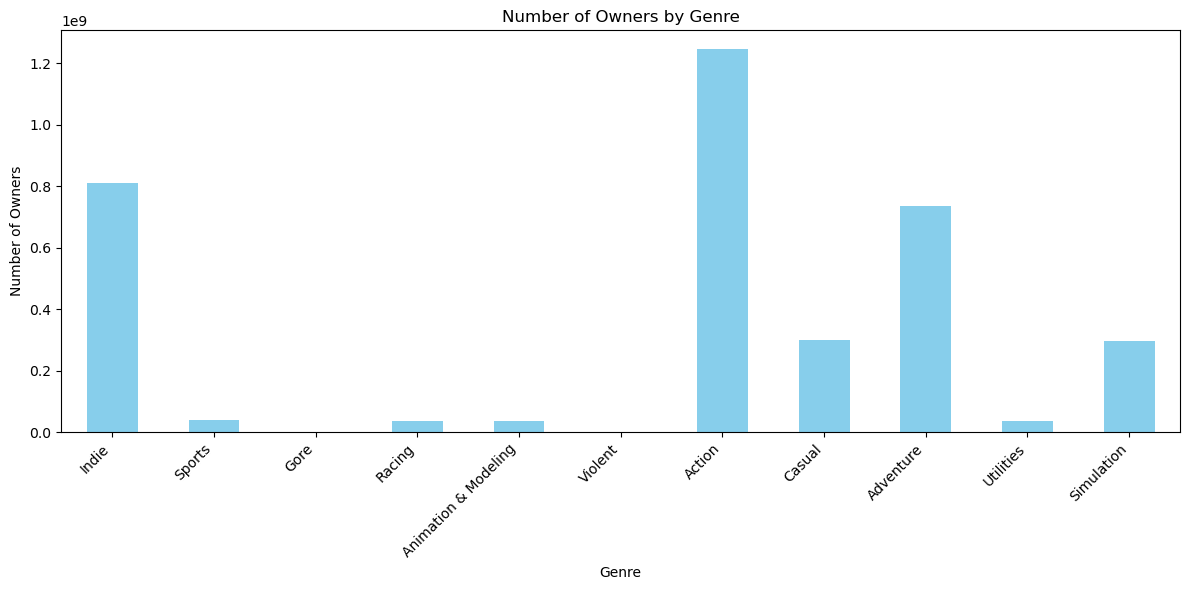

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df

# Create a new DataFrame with only the genre columns
genre_columns = ['Indie','Sports', 'Gore', 'Racing', 'Animation & Modeling', 'Violent', 'Action', 'Casual', 'Adventure', 'Utilities', 'Simulation']
genre_df = df[genre_columns]

# Create a new DataFrame by summing the number of owners for each genre
owners_by_genre = genre_df.multiply(df['owners'], axis=0).sum()

# Plotting
plt.figure(figsize=(12, 6))
owners_by_genre.plot(kind='bar', color='skyblue')
plt.title('Number of Owners by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Owners')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()


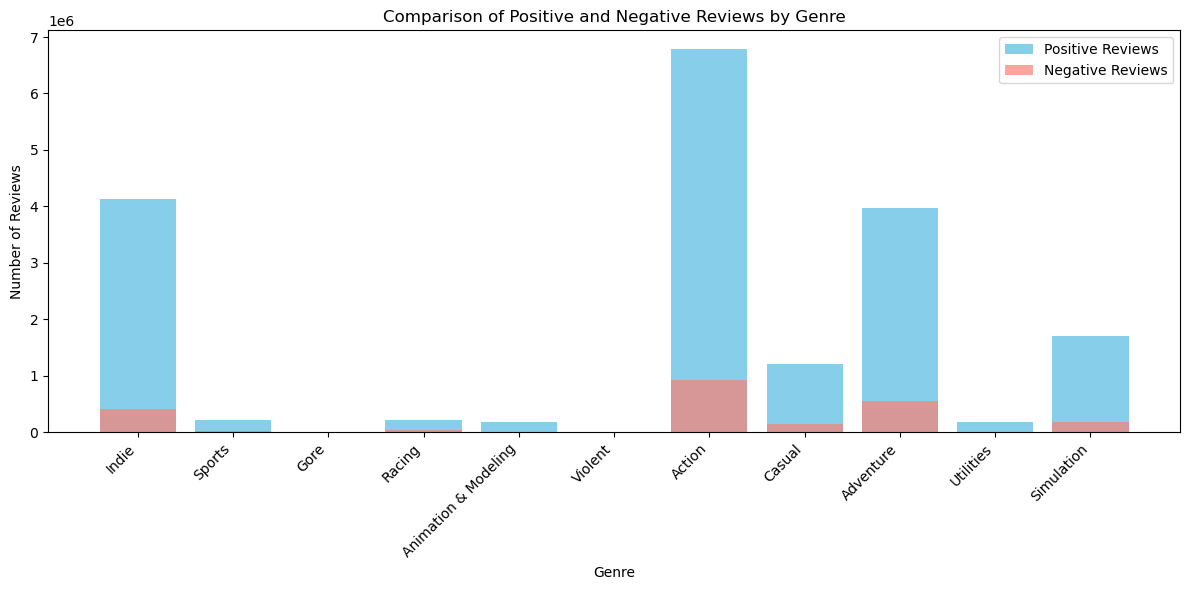

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df

# Create a new DataFrame with only the genre columns
genre_columns = ['Indie','Sports', 'Gore', 'Racing', 'Animation & Modeling', 'Violent', 'Action', 'Casual', 'Adventure', 'Utilities', 'Simulation']
genre_df = df[genre_columns]

# Multiply each genre column by the corresponding number of positive and negative reviews
positive_reviews_by_genre = genre_df.multiply(df['total_positive_reviews'], axis=0).sum()
negative_reviews_by_genre = genre_df.multiply(df['total_negative_reviews'], axis=0).sum()

# Plotting
plt.figure(figsize=(12, 6))

# Plotting positive reviews
plt.bar(positive_reviews_by_genre.index, positive_reviews_by_genre, color='skyblue', label='Positive Reviews')

# Plotting negative reviews
plt.bar(negative_reviews_by_genre.index, negative_reviews_by_genre, color='salmon', label='Negative Reviews', alpha=0.7)

plt.title('Comparison of Positive and Negative Reviews by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.legend()
plt.tight_layout()
plt.show()


In [17]:
df.head(5)

,game_id,game_name,is_free,categories,release_date,price,required_age,review_score_desc,total_positive_reviews,total_negative_reviews,...,Sports,Gore,Racing,Animation & Modeling,Violent,Action,Casual,Adventure,Utilities,Simulation
0,1744330,No More Heroes 3,False,"Single-player, Steam Achievements, Full contro...","11 Oct, 2022",CDN$ 49.99,17,Very Positive,232,46,...,0,0,0,0,0,1,0,0,0,0
1,1743380,SCP: Doki Doki Anomaly,False,"Single-player, Steam Achievements","7 Oct, 2021",CDN$ 6.69,0,Very Positive,51,4,...,0,0,0,0,0,0,0,0,0,0
2,1742450,西游记2021,False,Single-player,"30 Sep, 2021",CDN$ 11.49,0,No user reviews,0,0,...,0,0,0,0,0,0,1,1,0,0
3,1742470,My Newborn Life In A Harem,False,Single-player,"29 Mar, 2022",CDN$ 14.49,0,Mixed,18,12,...,0,0,0,0,0,0,1,0,0,0
4,1742500,My Dear Frankenstein -English Edition-,False,Single-player,"30 Sep, 2021",CDN$ 5.69,0,4 user reviews,4,0,...,0,0,0,0,0,0,0,1,0,0


In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your DataFrame is named 'df'
data = {
    'genres': ['Sports', 'Gore', 'Racing', 'Animation & Modeling', 'Violent', 'Action', 
               'Casual', 'Adventure', 'Utilities', 'Simulation'],
    'total_price': [
        df[df[genre] == 1]['price'].str.replace('CDN\$ ', '').astype(float).sum() 
        for genre in ['Sports', 'Gore', 'Racing', 'Animation & Modeling', 'Violent', 
                      'Action', 'Casual', 'Adventure', 'Utilities', 'Simulation']
    ]
}

# Create a DataFrame from the data
genre_price_df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(genre_price_df['genres'], genre_price_df['total_price'], color='skyblue')
plt.xlabel('Total Price (CAD $)')
plt.ylabel('Genres')
plt.title('Total Price for Each Genre')
plt.gca().invert_yaxis()  # Invert y-axis to display genres from top to bottom
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


ValueError: could not convert string to float: '$2.99 USD'